## Este notebook tem como objetivo apresentar os resultados obtidos no PIBIC

In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'

In [3]:
def loadArray(file_path):
    with open(file_path, 'rb') as stream:
        data = np.load(stream)
    return data

### Carrega os dados das simulações

In [12]:
# Dados para as métricas de CSPR
CSPR_BER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0.npy')
CSPR_BER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_1.npy')
CSPR_BER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_2.npy')
CSPR_BER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_3.npy')
CSPR_BER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_4.npy')
CSPR_SER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0.npy')
CSPR_SER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_1.npy')
CSPR_SER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_2.npy')
CSPR_SER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_3.npy')
CSPR_SER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_4.npy')
CSPR_SNR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0.npy')
CSPR_SNR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_1.npy')
CSPR_SNR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_2.npy')
CSPR_SNR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_3.npy')
CSPR_SNR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_4.npy')
CSPR_SIR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0.npy')
CSPR_SIR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_1.npy')
CSPR_SIR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_2.npy')
CSPR_SIR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_3.npy')
CSPR_SIR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_4.npy')

# Dados para as métricas de roll-off
Rolloff_SNR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_0.npy')
Rolloff_SNR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_1.npy')
Rolloff_SNR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_2.npy')
Rolloff_SNR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_3.npy')
Rolloff_SNR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_4.npy')
Rolloff_SIR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_0.npy')
Rolloff_SIR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_1.npy')
Rolloff_SIR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_2.npy')
Rolloff_SIR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_3.npy')
Rolloff_SIR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_4.npy')
Rolloff_SER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_0.npy')
Rolloff_SER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_1.npy')
Rolloff_SER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_2.npy')
Rolloff_SER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_3.npy')
Rolloff_SER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_4.npy')
Rolloff_BER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_0.npy')
Rolloff_BER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_1.npy')
Rolloff_BER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_2.npy')
Rolloff_BER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_3.npy')
Rolloff_BER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_4.npy')

# Dados para as métricas de FO
FO_BER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_0.npy')
FO_BER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_1.npy')
FO_BER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_2.npy')
FO_BER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_3.npy')
FO_BER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_4.npy')
FO_SER_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_0.npy')
FO_SER_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_1.npy')
FO_SER_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_2.npy')
FO_SER_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_3.npy')
FO_SER_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_4.npy')
FO_SNR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_0.npy')
FO_SNR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_1.npy')
FO_SNR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_2.npy')
FO_SNR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_3.npy')
FO_SNR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_4.npy')
FO_SIR_0 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_0.npy')
FO_SIR_1 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_1.npy')
FO_SIR_2 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_2.npy')
FO_SIR_3 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_3.npy')
FO_SIR_4 = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_4.npy')

CSPR_BER = np.mean([CSPR_BER_0, CSPR_BER_1, CSPR_BER_2, CSPR_BER_3, CSPR_BER_4], axis=0)
CSPR_SER = np.mean([CSPR_SER_0, CSPR_SER_1, CSPR_SER_2, CSPR_SER_3, CSPR_SER_4], axis=0)
CSPR_SIR = np.mean([CSPR_SIR_0, CSPR_SIR_1, CSPR_SIR_2, CSPR_SIR_3, CSPR_SIR_4], axis=0)
CSPR_SNR = np.mean([CSPR_SNR_0, CSPR_SNR_1, CSPR_SNR_2, CSPR_SNR_3, CSPR_SNR_4], axis=0)

Rolloff_SNR = np.mean([Rolloff_SNR_0, Rolloff_SNR_1, Rolloff_SNR_2, Rolloff_SNR_3, Rolloff_SNR_4], axis=0)
Rolloff_BER = np.mean([Rolloff_BER_0, Rolloff_BER_1, Rolloff_BER_2, Rolloff_BER_3, Rolloff_BER_4], axis=0)
Rolloff_SER = np.mean([Rolloff_SER_0, Rolloff_SER_1, Rolloff_SER_2, Rolloff_SER_3, Rolloff_SER_4], axis=0)
Rolloff_SIR = np.mean([Rolloff_SIR_0, Rolloff_SIR_1, Rolloff_SIR_2, Rolloff_SIR_3, Rolloff_SIR_4], axis=0)

FO_BER = np.mean([FO_BER_0, FO_BER_1, FO_BER_2, FO_BER_3, FO_BER_4], axis=0)
FO_SER_0 = np.mean([FO_SER_0, FO_SER_1, FO_SER_2, FO_SER_3, FO_SER_4], axis=0)
FO_SIR_0 = np.mean([FO_SIR_0, FO_SIR_1, FO_SIR_2, FO_SIR_3, FO_SIR_4], axis=0)
FO_SNR_0 = np.mean([FO_SNR_0, FO_SNR_1, FO_SNR_2, FO_SNR_3, FO_SNR_4], axis=0)

## CSPR variations results

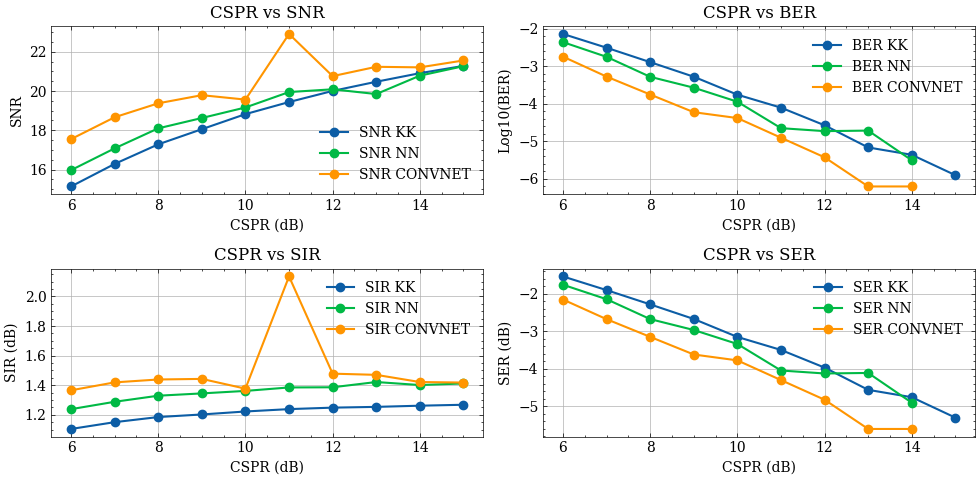

In [9]:
loPower = np.arange(6,16,1)
savePlots = True

labels = ['KK', 'NN', 'CONVNET']
fig, ax = plt.subplots(2, 2, figsize=(10,5))

for index in range(0, len(labels)):
    # Plot SNR
    ax[0,0].plot(loPower, CSPR_SNR[index,:],'-o', label='SNR '+labels[index])
    ax[0,0].set_xlabel('CSPR (dB)')
    ax[0,0].set_ylabel('SNR')
    ax[0,0].title.set_text('CSPR vs SNR')
    ax[0,0].legend()
    ax[0,0].grid()
    # Plot BER
    ax[0,1].plot(loPower, np.log10(CSPR_BER[index,:]),'-o', label='BER '+labels[index])
    ax[0,1].set_xlabel('CSPR (dB)')
    ax[0,1].set_ylabel('Log10(BER)')
    ax[0,1].title.set_text('CSPR vs BER')
    ax[0,1].legend()
    ax[0,1].grid()
    # Plot SIR
    ax[1,0].plot(loPower, np.log10(CSPR_SIR[index,:]),'-o', label='SIR '+labels[index])
    ax[1,0].set_xlabel('CSPR (dB)')
    ax[1,0].set_ylabel('SIR (dB)')
    ax[1,0].title.set_text('CSPR vs SIR')
    ax[1,0].legend()
    ax[1,0].grid()
    # Plot SER
    ax[1,1].plot(loPower, np.log10(CSPR_SER[index,:]),'-o', label='SER '+labels[index])
    ax[1,1].set_xlabel('CSPR (dB)')
    ax[1,1].set_ylabel('SER (dB)')
    ax[1,1].title.set_text('CSPR vs SER')
    ax[1,1].legend()
    ax[1,1].grid()
    
    plt.tight_layout()

if savePlots:
    plt.savefig(figurePath+'\CSPR_Results.png', dpi=600)

## Roll-off variations results

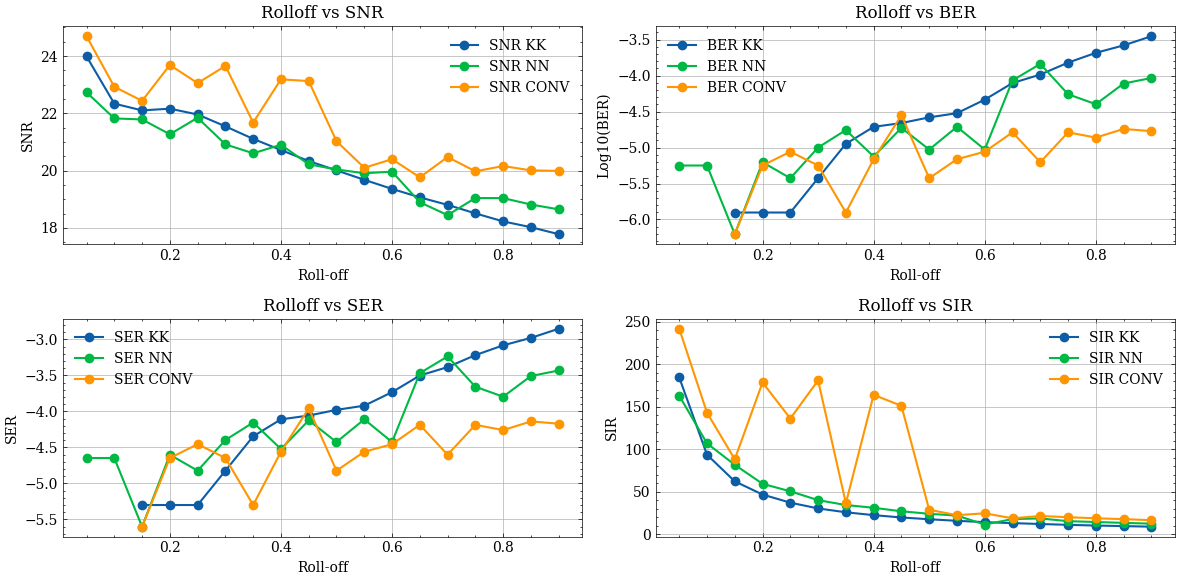

In [11]:
Rolloff = np.arange(0.05, 0.95, 0.05)
savePlots = False

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(Rolloff, Rolloff_SNR[0,:],'-o', label='SNR KK')
plt.plot(Rolloff, Rolloff_SNR[1,:],'-o', label='SNR NN')
plt.plot(Rolloff, Rolloff_SNR[2,:],'-o', label='SNR CONV')
plt.xlabel('Roll-off')
plt.ylabel('SNR')
plt.title('Rolloff vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(Rolloff, np.log10(Rolloff_BER[0,:]),'-o', label='BER KK')
plt.plot(Rolloff, np.log10(Rolloff_BER[1,:]),'-o', label='BER NN')
plt.plot(Rolloff, np.log10(Rolloff_BER[2,:]),'-o', label='BER CONV')
plt.xlabel('Roll-off')
plt.ylabel('Log10(BER)')
plt.title('Rolloff vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(Rolloff, np.log10(Rolloff_SER[0,:]),'-o', label='SER KK')
plt.plot(Rolloff, np.log10(Rolloff_SER[1,:]),'-o', label='SER NN')
plt.plot(Rolloff, np.log10(Rolloff_SER[2,:]),'-o', label='SER CONV')
plt.xlabel('Roll-off')
plt.ylabel('SER')
plt.title('Rolloff vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(Rolloff, Rolloff_SIR[0,:],'-o', label='SIR KK')
plt.plot(Rolloff, Rolloff_SIR[1,:],'-o', label='SIR NN')
plt.plot(Rolloff, Rolloff_SIR[2,:],'-o', label='SIR CONV')
plt.xlabel('Roll-off')
plt.ylabel('SIR')
plt.title('Rolloff vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(figurePath+'\Rolloff_Results.png', dpi=600)

## FO variations results

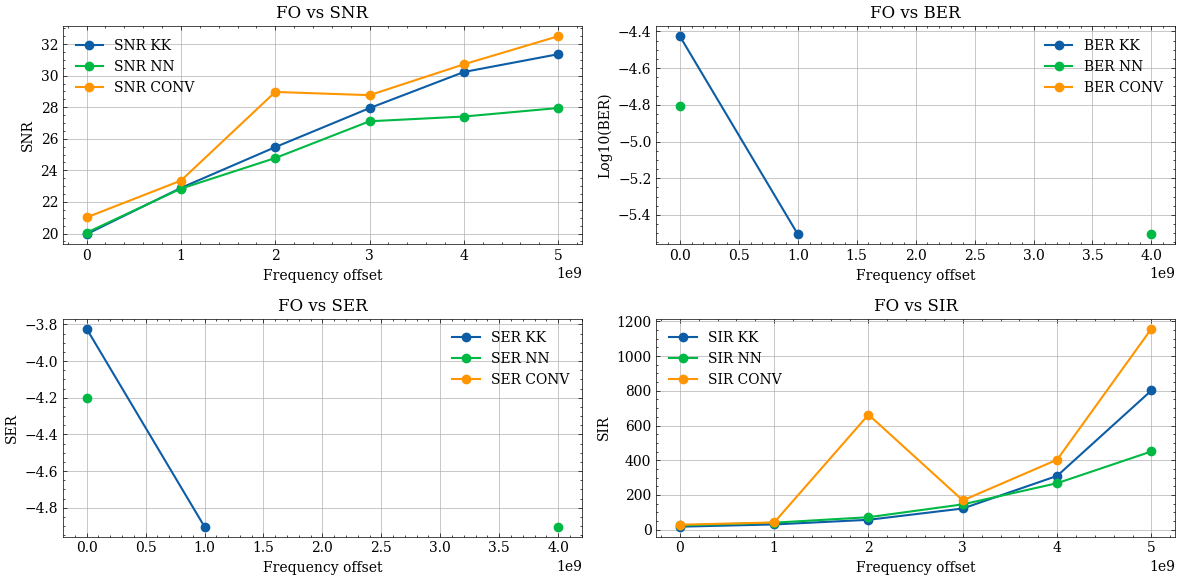

In [13]:
FO_Values = np.arange(0e9, 6e9, 1e9)
savePlots = False

FO_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_BER_SpS_4_128_Sample.npy')
FO_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SIR_SpS_4_128_Sample.npy')
FO_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SNR_SpS_4_128_Sample.npy')
FO_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SER_SpS_4_128_Sample.npy')

Conv_FO_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample.npy')
Conv_FO_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample.npy')
Conv_FO_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample.npy')
Conv_FO_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample.npy')


plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(FO_Values, FO_SNR[0,:],'-o', label='SNR KK')
plt.plot(FO_Values, FO_SNR[1,:],'-o', label='SNR NN')
plt.plot(FO_Values, Conv_FO_SNR[2,:],'-o', label='SNR CONV')
plt.xlabel('Frequency offset')
plt.ylabel('SNR')
plt.title('FO vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(FO_Values, np.log10(FO_BER[0,:]),'-o', label='BER KK')
plt.plot(FO_Values, np.log10(FO_BER[1,:]),'-o', label='BER NN')
plt.plot(FO_Values, np.log10(Conv_FO_BER[2,:]),'-o', label='BER CONV')
plt.xlabel('Frequency offset')
plt.ylabel('Log10(BER)')
plt.title('FO vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(FO_Values, np.log10(FO_SER[0,:]),'-o', label='SER KK')
plt.plot(FO_Values, np.log10(FO_SER[1,:]),'-o', label='SER NN')
plt.plot(FO_Values, np.log10(Conv_FO_SER[2,:]),'-o', label='SER CONV')
plt.xlabel('Frequency offset')
plt.ylabel('SER')
plt.title('FO vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(FO_Values, FO_SIR[0,:],'-o', label='SIR KK')
plt.plot(FO_Values, FO_SIR[1,:],'-o', label='SIR NN')
plt.plot(FO_Values, Conv_FO_SIR[2,:],'-o', label='SIR CONV')
plt.xlabel('Frequency offset')
plt.ylabel('SIR')
plt.title('FO vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(figurePath+'\FO_Results.png', dpi=600)